# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "output/cities.csv"
#city_data = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#city_data

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



584

In [4]:
cities

['georgetown',
 'vila velha',
 'dosso',
 'rikitea',
 'itarana',
 'auki',
 'pemangkat',
 'cape town',
 'veraval',
 'hobart',
 'port macquarie',
 'albany',
 'vestmannaeyjar',
 'tiksi',
 'busselton',
 'hithadhoo',
 'mataura',
 'aranda de duero',
 'vuktyl',
 'puerto ayora',
 'bethel',
 'tilichiki',
 'tuktoyaktuk',
 'saint-joseph',
 'ushuaia',
 'kapaa',
 'sabzevar',
 'calvinia',
 'castro',
 'east london',
 'hasaki',
 'kodiak',
 'kosum phisai',
 'usinsk',
 'kralendijk',
 'punta arenas',
 'chuy',
 'new norfolk',
 'nizhneyansk',
 'cayenne',
 'severo-kurilsk',
 'faanui',
 'katsuura',
 'ahipara',
 'carnarvon',
 'okha',
 'guerrero negro',
 'banff',
 'kavaratti',
 'dombarovskiy',
 'saldanha',
 'saint george',
 'jiwani',
 'plettenberg bay',
 'faya',
 'atuona',
 'nouadhibou',
 'illoqqortoormiut',
 'palmer',
 'hofn',
 'mahebourg',
 'onega',
 'sitka',
 'jamestown',
 'rebrikha',
 'tala',
 'vardo',
 'yellowknife',
 'biograd na moru',
 'kruisfontein',
 'nikolskoye',
 'mahanoro',
 'dingle',
 'chokurdakh',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
sample_city = ["ostrovnoy","zhuhai","Hars", "New York","new norfolk"]
#cities = []
#response = requests.get(query_url + "Paris").json()


# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
city_name = []
country =[]
date =[]

city_id = 1


# Loop through the list of cities and perform a request for data on each
for city in cities:
#for city in sample_city: 
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        lon.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing {city_id} - {city} found")
        print("----------")
        city_id += 1
#response
        #print(json.dumps(response, indent=4, sort_keys=False))
    
    except:
        print(f"{city} not found, skipping")
        print("------------")
        pass
        

Processing 1 - georgetown found
----------
Processing 2 - vila velha found
----------
Processing 3 - dosso found
----------
Processing 4 - rikitea found
----------
Processing 5 - itarana found
----------
Processing 6 - auki found
----------
Processing 7 - pemangkat found
----------
Processing 8 - cape town found
----------
Processing 9 - veraval found
----------
Processing 10 - hobart found
----------
Processing 11 - port macquarie found
----------
Processing 12 - albany found
----------
Processing 13 - vestmannaeyjar found
----------
Processing 14 - tiksi found
----------
Processing 15 - busselton found
----------
Processing 16 - hithadhoo found
----------
Processing 17 - mataura found
----------
Processing 18 - aranda de duero found
----------
Processing 19 - vuktyl found
----------
Processing 20 - puerto ayora found
----------
Processing 21 - bethel found
----------
Processing 22 - tilichiki found
----------
Processing 23 - tuktoyaktuk found
----------
Processing 24 - saint-joseph f

Processing 175 - esil found
----------
Processing 176 - nador found
----------
Processing 177 - kattivakkam found
----------
Processing 178 - katangli found
----------
Processing 179 - longyearbyen found
----------
Processing 180 - liverpool found
----------
Processing 181 - husavik found
----------
Processing 182 - pokhara found
----------
Processing 183 - sujangarh found
----------
Processing 184 - kalmunai found
----------
Processing 185 - turukhansk found
----------
Processing 186 - codrington found
----------
Processing 187 - novaya igirma found
----------
Processing 188 - tabou found
----------
Processing 189 - dunedin found
----------
Processing 190 - bredasdorp found
----------
Processing 191 - pedernales found
----------
Processing 192 - tura found
----------
Processing 193 - sorland found
----------
Processing 194 - bristol found
----------
Processing 195 - broome found
----------
skagastrond not found, skipping
------------
Processing 196 - bintulu found
----------
Processin

Processing 349 - hudiksvall found
----------
Processing 350 - goderich found
----------
Processing 351 - ginda found
----------
Processing 352 - muroto found
----------
Processing 353 - ishigaki found
----------
Processing 354 - clyde river found
----------
Processing 355 - hamilton found
----------
Processing 356 - hambantota found
----------
Processing 357 - abilene found
----------
Processing 358 - eydhafushi found
----------
Processing 359 - bereda found
----------
Processing 360 - sivas found
----------
Processing 361 - aquiraz found
----------
Processing 362 - nalut found
----------
Processing 363 - liwale found
----------
Processing 364 - winsum found
----------
Processing 365 - abadzekhskaya found
----------
Processing 366 - lebu found
----------
Processing 367 - chenzhou found
----------
Processing 368 - zaysan found
----------
Processing 369 - fairbanks found
----------
Processing 370 - pisco found
----------
Processing 371 - mount gambier found
----------
Processing 372 - sh

Processing 530 - bonthe found
----------
Processing 531 - melfi found
----------
karauzyak not found, skipping
------------
Processing 532 - palembang found
----------
Processing 533 - van wert found
----------
Processing 534 - zeya found
----------
Processing 535 - balurghat found
----------
Processing 536 - jackson found
----------
Processing 537 - byron bay found
----------
Processing 538 - luanda found
----------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#api dataframe
city_data = pd.DataFrame({
    "City":city_name,
    "Country":country,
    "Max Temp": max_temp,
    "Date":date,
   "Cloudiness":cloud,
   "Lat":lat,
    "Lng":lon,
    "Wind Speed": wind_speed,
    "Humidity":humidity})

city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,George Town,MY,75.20,1619481639,40,5.4112,100.3354,1.14,94
1,Vila Velha,BR,78.80,1619481639,40,-20.3297,-40.2925,2.30,89
2,Dosso,NE,89.49,1619481363,81,13.0490,3.1937,4.32,27
3,Rikitea,PF,78.06,1619481640,72,-23.1203,-134.9692,7.99,72
4,Itarana,BR,71.74,1619481640,58,-19.8739,-40.8753,3.49,88
...,...,...,...,...,...,...,...,...,...
533,Zeya,RU,49.35,1619481795,98,53.7500,127.2667,13.09,58
534,Bālurghāt,IN,79.63,1619481795,87,25.2167,88.7667,4.03,14
535,Jackson,US,60.01,1619481502,90,42.4165,-122.8345,9.22,41
536,Byron Bay,AU,68.00,1619481658,40,-28.6500,153.6167,9.22,77


In [7]:
city_data.to_csv("WeatherPy/WeatherPy.csv",encoding="utf-8",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
clean_city_data = city_data.loc[city_data["Humidity"] < 100]
clean_city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,George Town,MY,75.20,1619481639,40,5.4112,100.3354,1.14,94
1,Vila Velha,BR,78.80,1619481639,40,-20.3297,-40.2925,2.30,89
2,Dosso,NE,89.49,1619481363,81,13.0490,3.1937,4.32,27
3,Rikitea,PF,78.06,1619481640,72,-23.1203,-134.9692,7.99,72
4,Itarana,BR,71.74,1619481640,58,-19.8739,-40.8753,3.49,88
...,...,...,...,...,...,...,...,...,...
533,Zeya,RU,49.35,1619481795,98,53.7500,127.2667,13.09,58
534,Bālurghāt,IN,79.63,1619481795,87,25.2167,88.7667,4.03,14
535,Jackson,US,60.01,1619481502,90,42.4165,-122.8345,9.22,41
536,Byron Bay,AU,68.00,1619481658,40,-28.6500,153.6167,9.22,77


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

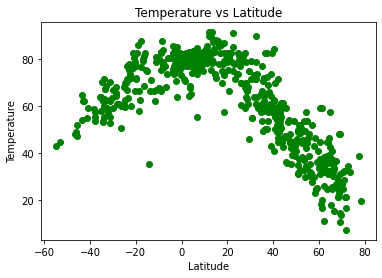

In [11]:
#Temp vs Lat   #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], marker="o", color="green")
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig('WeatherPy/temp_lat.png')
plt.show()


## Latitude vs. Humidity Plot

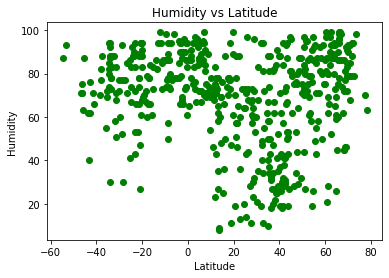

In [12]:
#Humidity vs Lat #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], marker="o", color="green")
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('WeatherPy/hum_lat.png')
plt.show()

## Latitude vs. Cloudiness Plot

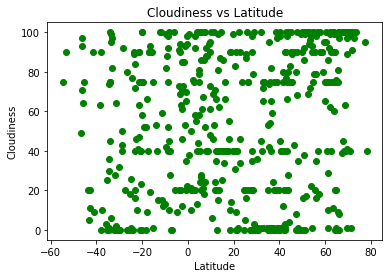

In [13]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], marker="o", color="green")
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('WeatherPy/cloud_lat.png')
plt.show()

## Latitude vs. Wind Speed Plot

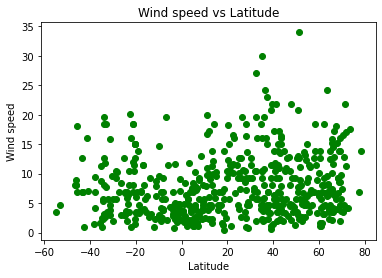

In [14]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], marker="o", color="green")
plt.title("Wind speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.savefig('WeatherPy/wind_lat.png')
plt.show()

## Linear Regression

In [15]:
north = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
north
south = clean_city_data.loc[(clean_city_data["Lat"] <= 0)]
south

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
1,Vila Velha,BR,78.80,1619481639,40,-20.3297,-40.2925,2.30,89
3,Rikitea,PF,78.06,1619481640,72,-23.1203,-134.9692,7.99,72
4,Itarana,BR,71.74,1619481640,58,-19.8739,-40.8753,3.49,88
5,Auki,SB,83.17,1619481196,98,-8.7676,160.7034,4.21,78
7,Cape Town,ZA,63.00,1619481422,75,-33.9258,18.4232,12.66,94
...,...,...,...,...,...,...,...,...,...
520,Rusape,ZW,57.70,1619481791,52,-18.5278,32.1284,3.40,67
522,Vao,NC,73.63,1619481791,46,-22.6667,167.4833,20.11,66
531,Palembang,ID,75.20,1619481794,20,-2.9167,104.7458,2.30,94
536,Byron Bay,AU,68.00,1619481658,40,-28.6500,153.6167,9.22,77


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

TypeError: annotate() missing 1 required positional argument: 'xy'

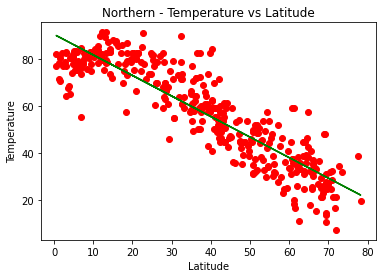

In [16]:
x_values = north["Lat"]
y_values = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title("Northern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,loc="best",fontsize=15,color="green")
plt.savefig('WeatherPy/north_temp_lat.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:

x_values = north["Lat"]
y_values = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(50,12),fontsize=15,color="green")
plt.savefig('WeatherPy/north_hum_lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = north["Lat"]
y_values = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(75,5),fontsize=15,color="green")
plt.savefig('WeatherPy/north_cloud_lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = north["Lat"]
y_values = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Wind speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(0,29),fontsize=15,color="green")
plt.savefig('WeatherPy/north_wind_lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Northern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(-25,40),fontsize=15,color="green")
plt.savefig('WeatherPy/south_temp_lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,20),fontsize=15,color="green")
plt.savefig('WeatherPy/south_hum_lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-10,0),fontsize=15,color="green")
plt.savefig('WeatherPy/south_cloud_lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(-30,40),fontsize=15,color="green")
plt.savefig('WeatherPy/south_wind_lat.png')
plt.show()